# One-shot learning (N-way) using Omniglot data set and Siamese Neural Networks

This notebook shows an implementation version of the paper [koch et al, Siamese Neural Networks for One-shot Image Recognition](http://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf).

The model has been created with [keras](https://keras.io/).

## One-shot learning (N-way)

Humans learn new concepts with very little supervision – e.g. a child can generalize the concept
of “giraffe” from a single picture in a book.

Deep learning has made major advances in areas such as speech, vision and language, but is notorious for requiring large datasets.

The process of learning good features for machine learning applications can be very computationally expensive and may prove difficult in cases where little data is available.

One-shot learning is a clasification problem in machine learning, that aims to learn information about classes from one, or only a few, training examples.

An one-shot task aims to classify a test example, X, into one the N unique classes (N-ways) of a support set S which is a representation of the available C classes.

The model is given the support set and it is also given a test example that has to classify.

Since exactly one example in the support set has the right class of the test example, the aim is to correctly predict which support example is the same as the test example.

## Omniglot data set

The data set contains 50 alphabets total, splitted into a background set of 30 alphabets and an evaluation set of 20 alphabets. There is no overlap between the training and test data sets.

Each alphabet has a number of characters from 14 to 55 different characters drawn by 20 different subjects, resulting in 20 105x105 images for each character with a total of 1623 character classes.

The background set is only used to learn general knowledge about characters (e.g., hyperparameter inference or feature learning). One-shot learning results are reported using alphabets from the evaluation set.

![alt text](./images/omniglot_general.png "Omniglot Data Set")

Following are some of the alphabets represented in the data set:

![alt text](./images/omniglot_alphabets.png "Omniglot Alphabets")

An example of a 20-way one-shot task in this dataset can be seen in the following figure:
    
![alt text](./images/omniglot_20_way.png "Omniglot 20-way task")

### Omniglot Service

The data set is retrieved using OmniglotService class.

It download and unzip the data set to the path specified when creating the class (./data by default) within the train_set and test_set folders respectively.

In [1]:
from omniglot_service import OmniglotService

data_service = OmniglotService()
data_service.get_data()

Unziping data/images_background.zip to data
Rename data/images_background to data/train_set
Unziping data/images_evaluation.zip to data
Rename data/images_evaluation to data/test_set


You can also retrieve the data by set type (train/test) and specify the folder name where will be unzip.

In [2]:
data_service.get_data_type('test_alphabets', data_type='test')

Unziping data/images_evaluation.zip to data
Rename data/images_evaluation to data/test_alphabets


Data folder content after getting the data:

In [3]:
!ls ./data

test_alphabets test_set       train_set


Below there is a summary of the folders content:

In [4]:
print("Train Set:")
number_alphabets = !ls ./data/train_set | wc -l
print(f'Number of alphabets = {number_alphabets[0]}')
alphabets = !ls ./data/train_set | head -5
print(f'First five alphabets = {alphabets}')
classes = !ls ./data/train_set/Alphabet_of_the_Magi | head -5
print(f'First five classes of first alphabet = {classes}')
images = !ls ./data/train_set/Alphabet_of_the_Magi/character01 | head -5
print(f'First five images of first character of first alphabet = {images}')
print()
print("Test Set:")
number_alphabets = !ls ./data/test_set | wc -l
print(f'Number of alphabets  = {number_alphabets[0]}')
alphabets = !ls ./data/test_set | head -5
print(f'First five alphabets = {alphabets}')
classes = !ls ./data/test_set/Angelic | head -5
print(f'First five classes of first alphabet = {classes}')
images = !ls ./data/test_set/Angelic/character01 | head -5
print(f'First five images of first character of first alphabet = {images}')

Train Set:
Number of alphabets =       30
First five alphabets = ['Alphabet_of_the_Magi', 'Anglo-Saxon_Futhorc', 'Arcadian', 'Armenian', 'Asomtavruli_(Georgian)']
First five classes of first alphabet = ['character01', 'character02', 'character03', 'character04', 'character05']
First five images of first character of first alphabet = ['0709_01.png', '0709_02.png', '0709_03.png', '0709_04.png', '0709_05.png']

Test Set:
Number of alphabets  =       20
First five alphabets = ['Angelic', 'Atemayar_Qelisayer', 'Atlantean', 'Aurek-Besh', 'Avesta']
First five classes of first alphabet = ['character01', 'character02', 'character03', 'character04', 'character05']
First five images of first character of first alphabet = ['0965_01.png', '0965_02.png', '0965_03.png', '0965_04.png', '0965_05.png']


### Omniglot Loader

The data set is loaded into memory from the specified data set types folders using OmniglotLoader class.

If any of the folders doesn't exist the loader uses the OmniglotService to retrieve de data set.

Each data set type is stored in a tuple respectively with the first element being the data and the second the classes in the format 'alphabet/character' and saved to a pickle file to load it more quickly in subsequents loads.

In [5]:
from omniglot_loader import OmniglotLoader

omniglot_loader = OmniglotLoader(path='./data', train_folder='train_set', test_folder='test_set')
train_set, test_set = omniglot_loader.load_data()

Loading data from data/train_set
Saving data to data/train.pickle
Loading data from data/test_set
Saving data to data/test.pickle


In [6]:
train_set, test_set = omniglot_loader.load_data()

Loading data from data/train.pickle
Loading data from data/test.pickle


Below there is a summary of the tuple's content:

In [7]:
print("Train Set:")
classes, images_per_class, height, width, channels = train_set[0].shape
print(f'Number of classes = {classes}')
print(f'Images per class  = {images_per_class}')
print(f'Image shape (H,W,C) = {height}, {width}, {channels}')
print(f'First five classes = {train_set[1][0:5]}')
print()
print("Test Set:")
classes, images_per_class, height, width, channels = test_set[0].shape
print(f'Number of classes = {classes}')
print(f'Images per class  = {images_per_class}')
print(f'Image shape (H,W,C) = {height}, {width}, {channels}')
print(f'First five classes = {test_set[1][0:5]}')
print()
common_classes = set(train_set[1])&set(test_set[1])
print(f'Number of classes in both data sets = {len(common_classes)}')

Train Set:
Number of classes = 964
Images per class  = 20
Image shape (H,W,C) = 105, 105, 1
First five classes = ['Alphabet_of_the_Magi/character01' 'Alphabet_of_the_Magi/character02'
 'Alphabet_of_the_Magi/character03' 'Alphabet_of_the_Magi/character04'
 'Alphabet_of_the_Magi/character05']

Test Set:
Number of classes = 659
Images per class  = 20
Image shape (H,W,C) = 105, 105, 1
First five classes = ['Angelic/character01' 'Angelic/character02' 'Angelic/character03'
 'Angelic/character04' 'Angelic/character05']

Number of classes in both data sets = 0


Following is a random sample of each data set:

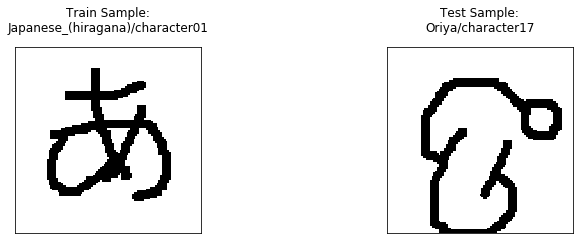

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def display_image_pair(first_item, second_item):
    fig,(ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.matshow(first_item[0], cmap='gray')
    ax2.matshow(second_item[0], cmap='gray')
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    ax1.set_title(f'Train Sample:\n{first_item[1]}')
    ax2.get_yaxis().set_visible(False)
    ax2.get_xaxis().set_visible(False)
    ax2.set_title(f'Test Sample:\n{second_item[1]}')
    plt.subplots_adjust(wspace=1)
    plt.show()
    
train_class = np.random.randint(train_set[1].shape[0])
train_image = train_set[0][train_class][0].reshape(height, width)
test_class = np.random.randint(len(test_set[1]))
test_image = test_set[0][test_class][0].reshape(height, width)

display_image_pair((train_image, train_set[1][train_class]), (test_image, test_set[1][test_class]))

### Omniglot Dataset

The in memory data set is managed using OmniglotDataset class.

The class load the data set using the OmniglotLoader class and split the train set in train and validation sets, leaving the test set unaltered.

In [9]:
from omniglot_dataset import OmniglotDataset

omniglot_dataset = OmniglotDataset()
omniglot_dataset.load()

Loading data from data/train.pickle
Loading data from data/test.pickle


Each of the data sets tuple (train, validation and test) can be accessed using the corresponding class property/variable.
Each data set type is stored in a tuple respectively with the first element being the data and the second the classes in the format 'alphabet/character' and they can be accessed using the corresponding instance property/variable.

In [10]:
print('Train Set:')
print(f'Shape = {omniglot_dataset.train_set[0].shape}')
print(f'Classes: {omniglot_dataset.train_set[1][:5]}...{omniglot_dataset.train_set[1][-5:]}')
print()
print('Validation Set:')
print(f'Shape = {omniglot_dataset.val_set[0].shape}')
print(f'Classes: {omniglot_dataset.val_set[1][:5]}...{omniglot_dataset.val_set[1][-5:]}')
print()
print('Test Set:')
print(f'Shape = {omniglot_dataset.test_set[0].shape}')
print(f'Classes: {omniglot_dataset.test_set[1][:5]}...{omniglot_dataset.test_set[1][-5:]}')

Train Set:
Shape = (673, 20, 105, 105, 1)
Classes: ['Alphabet_of_the_Magi/character01' 'Alphabet_of_the_Magi/character02'
 'Alphabet_of_the_Magi/character03' 'Alphabet_of_the_Magi/character04'
 'Alphabet_of_the_Magi/character05']...['Korean/character36' 'Korean/character37' 'Korean/character38'
 'Korean/character39' 'Korean/character40']

Validation Set:
Shape = (291, 20, 105, 105, 1)
Classes: ['Latin/character01' 'Latin/character02' 'Latin/character03'
 'Latin/character04' 'Latin/character05']...['Tifinagh/character51' 'Tifinagh/character52' 'Tifinagh/character53'
 'Tifinagh/character54' 'Tifinagh/character55']

Test Set:
Shape = (659, 20, 105, 105, 1)
Classes: ['Angelic/character01' 'Angelic/character02' 'Angelic/character03'
 'Angelic/character04' 'Angelic/character05']...['ULOG/character22' 'ULOG/character23' 'ULOG/character24'
 'ULOG/character25' 'ULOG/character26']


The class also has a property/variable with the data shape that uses the different data set types:

In [11]:
omniglot_dataset.data_shape

(105, 105, 1)

The class also have two helper methods to retrieve random classes from a data set type:

In [12]:
train_classes = omniglot_dataset.get_data_classes(4)
print(f'Returned train classes = {omniglot_dataset.train_set[1][train_classes]}')
print()
val_classes = omniglot_dataset.get_data_classes(4, data_type='val')
print(f'Returned validation classes = {omniglot_dataset.val_set[1][val_classes]}')
print()
test_classes = omniglot_dataset.get_data_classes(4, data_type='test')
print(f'Returned test classes = {omniglot_dataset.test_set[1][test_classes]}')

Returned train classes = ['Futurama/character25' 'Japanese_(katakana)/character14'
 'Braille/character16' 'Gujarati/character08']

Returned validation classes = ['Tifinagh/character26' 'Malay_(Jawi_-_Arabic)/character29'
 'Tifinagh/character40' 'Mkhedruli_(Georgian)/character30']

Returned test classes = ['Old_Church_Slavonic_(Cyrillic)/character18' 'Mongolian/character02'
 'Ge_ez/character24' 'Manipuri/character35']


And to get a random pair of images of the same/different class/es from a data set type, in this case the train data set type:

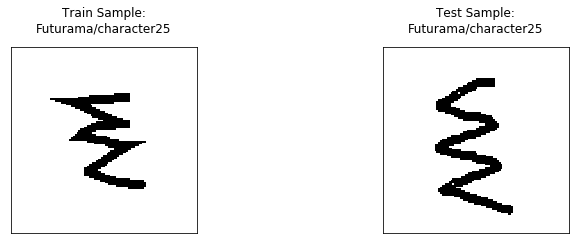

In [13]:
first_class = train_classes[0]
first_class_name = omniglot_dataset.train_set[1][first_class]
first_image, second_image = omniglot_dataset.get_image_pair(first_class, data_type='train', same_class='true')
display_image_pair((first_image.reshape(height, width), first_class_name), 
                   (second_image.reshape(height, width), first_class_name))

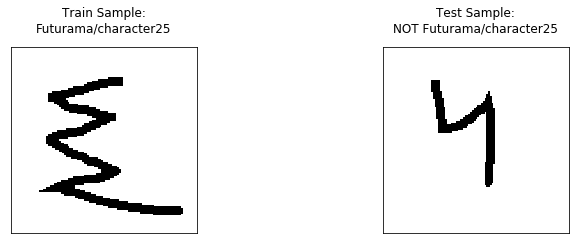

In [14]:
first_class = train_classes[0]
first_class_name = omniglot_dataset.train_set[1][first_class]
first_image, second_image = omniglot_dataset.get_image_pair(first_class, data_type='train')
display_image_pair((first_image.reshape(height, width), first_class_name), 
                   (second_image.reshape(height, width), f'NOT {first_class_name}'))

Both methods will be used by the runner to create batchs of data.

## Siamese Neural Networks

Siamese nets were first introduced in the early 1990s by Bromley and LeCun to solve signature verification as an image matching problem [Bromley et al., 1993](https://papers.nips.cc/paper/769-signature-verification-using-a-siamese-time-delay-neural-network.pdf). 

A siamese neural network consists of twin networks which accept distinct inputs but are joined by an energy function at the top. This function computes some metric between the highestlevel feature representation on each side. 

The parameters between the twin networks are tied. Weight tying guarantees that two extremely similar images could not possibly be mapped by their respective networks to very different locations in feature space because each network computes the same function. 

Also, the network is symmetric, so that whenever we present two distinct images to the twin networks, the top conjoining layer will compute the same metric as if we were to we present the same two images but to the opposite twins.

![alt text](./images/siamese_networks.png "Siamese Neural Networks")

The paper uses the weighted L1 distance between the twin feature vectors h1 and h2 combined with a sigmoid activation, which maps onto the interval [0, 1]. Thus a cross-entropy objective is a natural choice for training the network.

The CNN architecture of each network has 9 layers, including Max Pooling and Convolutional layers of different filter sizes.
These 9 layers work as feature extractor/selector for the siamese architecture.

![alt text](./images/feature_extractor.png "Feature Extractor Network")

All layers in the feature extractor are initialized with weights having 0 mean 0.01 standard deviation, and bias with a mean value of 0.5 and a standard deviation of 0.01, except for the first convolutional layer (the input layer), which its bias are not initialized. L2 regularization of 0.0004 is also used for all layers except for the last one that uses 0.002.

Adam optimizer with the default configuration has been used to compile the model.

### Siamese Networks

The SiameseNetworks class create an instance of the siamese networks with the specific data input that is passed in the constructor, in this case the one defined by omniglot_dataset.data_shape.

The instance created has a model property/variable whichs contains the keras model.

In [15]:
from siamese_net import SiameseNet

siamese_net = SiameseNet(omniglot_dataset.data_shape)
siamese_net.model.summary()

Using TensorFlow backend.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
left_encoder_input (InputLayer) (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
right_encoder_input (InputLayer (None, 105, 105, 1)  0                                            
__________________________________________________________________________________________________
encoder (Sequential)            (None, 4096)         38947648    left_encoder_input[0][0]         
                                                                 right_encoder_input[0][0]        
__________________________________________________________________________________________________
l1_distance (Lambda)            (None, 4096)         0           encoder[1][0]                    
          

Following is the layers of one of the feature extractor networks:

In [16]:
siamese_net.model.layers[2].layers

The model loss, metrics and optimizer configuration:

In [17]:
print(f'Model loss function: {siamese_net.model.loss}')
print(f'Model metric functions: {siamese_net.model.metrics}')
print(f'Model optimizer: {siamese_net.model.optimizer}')

Model loss function: binary_crossentropy
Model metric functions: ['accuracy']
Model optimizer: <keras.optimizers.Adam object at 0xb288bbcc0>


### One Shot Runner

The One Shot Runner class run one shot experiments on a model using a specific data set.

The model and data set are passed as parameters when creating the runner instance, in our case we create the runner object with a omniglot data set and a siamese network model.

In [18]:
from one_shot_runner import OneShotRunner

one_shot_runner = OneShotRunner(omniglot_dataset, siamese_net.model)

A runner instance has two methods, train and predict in order to run experiments.

Train, as the suggests, train the model using the data set for a series of iterations, using a specific n-way value and evaluating the training performance on the validation set with a specific number of validations.

All those parameters are configurable in the method signature, the default configuration is for experiments on one shot 20-way tasks with epochs of 10000 iterations each and 50 validation on the validation data set type for each evaluation.

In [ ]:
one_shot_runner.train(number_ways=20, number_iterations=10000, number_validations=50)

The runner reports/save the following parameters during the training process:

- Report training loss and accuracy every 100 iterations
- Report validation loss and accuracy every 1000 iterations
- Save training/evaluation state (loss and accuracy) and model weights every 1000 iterations

All the parameters are stored at the ./model folder within the training_data.pickle and model_weights.h5 files respectively.

This allow us to start the experiment in an specific state, we just need to enable the corresponding flag parameter in the train method, which is disabled by default.

In [ ]:
one_shot_runner.train(preload_state=True)

Preloading model weights  
Preloading training data  
Start training for 10000 iterations with 50 validations per 20-ways evaluation  
iteration 100, loss = 0.95, accuracy = 50.00  
...  
...  
...  

Every iteration, the model is feeded with batches of 32 samples from the train set, each sample is 2 omniglot images.
The pair of images of half of the batch samples belong to the same class and the other half belong to different classes.
The batch is shuffle before feeding the model.

A 8 samples batch would be as displayed below.

NOTE THAT THE METHOD IS PUBLIC JUST TO SHOW HOW A TRAINING BATCH IS, IT SHOULD BE ENCAPSULATED (PRIVATE) IN THE RUNNER CLASS AND THE BATCH_SIZE BE CONFIGURABLE

In [19]:
inputs, labels = one_shot_runner.get_train_batch(batch_size=8)

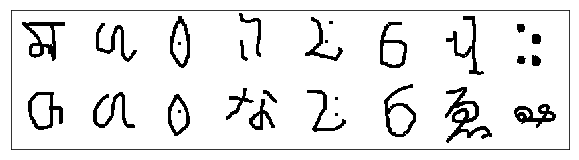

Labels: [0. 1. 1. 0. 1. 1. 0. 0.]


In [20]:
def display_batch(first_input, second_input):
    from functools import reduce
    first_input = first_input.squeeze()
    second_input = second_input.squeeze()
    first_plot = reduce((lambda x, y: np.append(x, y, axis=1)), first_input)
    second_plot = reduce((lambda x, y: np.append(x, y, axis=1)), second_input)
    final_plot = np.append(first_plot, second_plot, axis=0)
    fig,(ax1) = plt.subplots(1, 1, figsize=(10, 10))
    ax1.matshow(final_plot, cmap='gray')
    ax1.get_yaxis().set_visible(False)
    ax1.get_xaxis().set_visible(False)
    plt.show()
display_batch(*inputs)
print(f'Labels: {labels}')